# **Credit Card Approval Prediction Model**

## **Business Problem**

---

We need to find out how we can effectively predict if an individual should be given credit card or it should be rejected. Offering credit card involves great risk of losing money for financial institutions, therefore doing a thorough research and having an accurate prediction model that can predit whether a customer is credit worthy or not, plays a vital role in the process.

> **Questions to Answer**

1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  

>The significance of my proposal in the today's world lies in the prevalent uncertainties, with frequent job losses and escalating liabilities. In this context, assessing an individual's creditworthiness becomes crucial, considering various aspects of their profile, to make informed decisions on extending credit card privileges.

2. How is it going to impact the banking sector?

>The impact on the banking sector is substantial, as credit cards essentially function as short-term loans. Identifying creditworthy customers can contribute to business growth, while inaccurately identifying individuals as creditworthy may lead to defaults, resulting in financial losses for banks.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

>In addressing potential gaps in knowledge, the dynamic nature of customer profiles poses a challenge. A mere visual inspection of a customer's profile is insufficient to determine credit eligibility. The Machine Learning model employed in the proposal conducts thorough evaluations, minimizing the risk of credit defaults. This is particularly relevant for the future of banks in India, where the customer base is expanding rapidly, making manual assessments impractical given the time constraints of today's world.

## **Approach**

---

Predicting credit card approval involves building a classification model to determine whether an individual's application should be approved or not. Here are some of the steps taken in this project:

1. **Data Exploration and Cleaning:**
* *Explore the distribution of the target variable ('Credit_Card_Approval') to understand the class balance.*
* *Check for missing values in other relevant columns.*
* *Explore the distributions and relationships between features and the target variable.*

2. **Feature Engineering:**

* *Extract relevant features that might impact credit card approval.*
* *Convert categorical variables into a suitable format for modeling (e.g., one-hot encoding).*
* *Transform numerical variables if needed (e.g., scaling).*

3. **Train-Test Split:**

* *Split the dataset into training and testing sets to evaluate the model's performance on unseen data.*

4. **Model Selection:**

* *Choose a classification algorithm based on the data characteristics. Common choices include logistic regression, decision trees, random forests, and gradient boosting methods.*
* *Experiment with different algorithms and hyperparameters to find the model that performs best for the specific case.*

5. **Model Training:**

* *Train the chosen model on the training set.*

6. **Model Evaluation:**

* *Evaluate the model's performance on the testing set using metrics such as accuracy, precision, recall and F1-score*
* *Consider the business implications of false positives and false negatives.*

8. **Hyperparameter Tuning:**

* *Fine-tune the hyperparameters of the model to improve performance.*


## **Data Exploration and Cleaning**

---

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
# dataset 1 that has customer details
data1 = pd.read_csv("/content/drive/MyDrive/Data_Analysis/OdinSchool/EDA+ML Capstone/Capstone1/Dataset/Credit_card.csv")

# dataset 2 that has credit card approval or rejection details
data2 = pd.read_csv("/content/drive/MyDrive/Data_Analysis/OdinSchool/EDA+ML Capstone/Capstone1/Dataset/Credit_card_label.csv")

In [3]:
# checking the size of dataset before merging to confirm if both dataset are of same size
print("Data 1: ",data1.shape)
print("Data 2: ",data2.shape)

Data 1:  (1548, 18)
Data 2:  (1548, 2)


We can see both dataset has 1548 rows

In [4]:
# merging both the datasets into one using inner join based on common column that is Ind_ID
data = pd.merge(data1, data2, on='Ind_ID', how='inner')

In [5]:
# Checking the size of dataset to check if both dataset successfully merged
data.shape

(1548, 19)

Both dataset successfully merged therefore we are 19 columns

In [6]:
# Getting first 5 entries
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


There are some null values spotted

In [7]:
# Getting last 5 entries
data.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


<Axes: >

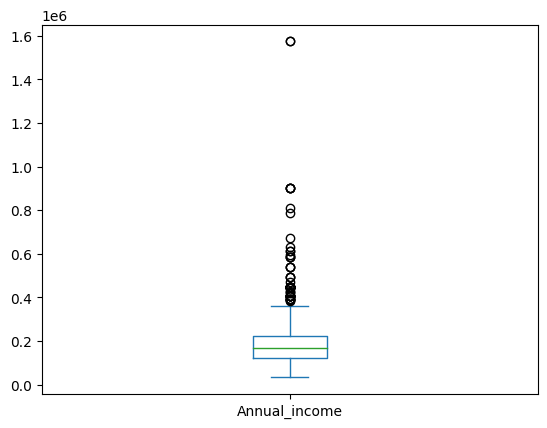

In [8]:
# plotting the Annual income to see if we have extreme values
data["Annual_income"].plot(kind="box")

we can see there are many extreme values above the upper fence

<Axes: >

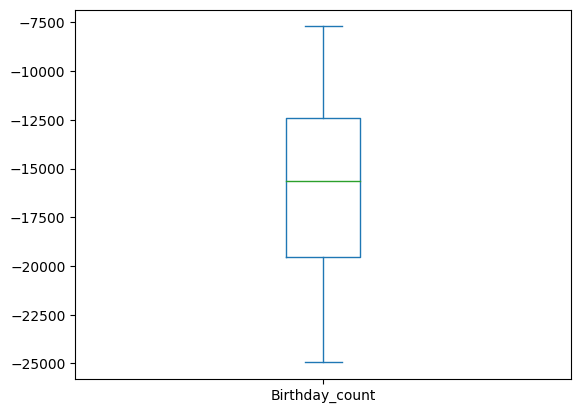

In [9]:
data["Birthday_count"].plot(kind="box")

Birthday count appears normal in case of outliers

In [10]:
# Checking number of records in each column, nulls and Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

***Observations***:
1.  **GENDER, Annual_Income,Birthday_count and Type_Occupation** columns has missing values.
2. **Numerical Variables:** Ind_ID, CHILDREN, Annual_Income, Birthday_count, Employed_days, Mobile_phone, Work_phone, Phone, EMAIL_ID, Family_Members, label
3. **Categorical Variables:** GENDER, Car_Owner, Property_Owner, Type_Income, EDUCATION, Marital_status, Housing_type, Type_Occupation
4. Type_Occupation has **31.5%** missing values

In [11]:
# Checking if dataset has duplicates
data.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

We can see thaat there are duplicates in all the columns. However, if we focus on the data we have in the columns, having duplicates makes sense for example people can have same gender, number of children, annual income etc. Therefore, we will keep it as is.

In [12]:
# Calculating the missing values in dataset
(data.isnull().sum()/(len(data)))*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

We can see that occupation type has most number of null values, that we will impute later

In [13]:
# Converting Birthday_count into age
data['Birthday_count'] = data['Birthday_count'].abs()
data['Age'] = data['Birthday_count'] / 365.25

median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)
data['Age'] = data['Age'].astype(int)
data.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,18772.0,365243,1,0,0,0,NaN,2,1,51
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,NaN,2,1,37
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,42
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,NaN,2,1,37
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,NaN,2,1,37


Age column data type is converted to integer after replacing the null values with median age

In [14]:
# Converting Employed days into Tenure after making the values positve
data['Employed_days'] = data['Employed_days'].abs()
data['Tenure_of_Employment'] = data['Employed_days'] / 365.25

# Since tenure can be be in decimals, hence, converting the column into float data type
data['Tenure_of_Employment'] = data['Tenure_of_Employment'].astype(float).round(1)


In [15]:
# Checking if the tenure got calculated correctly
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Tenure_of_Employment
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NaN,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NaN,2,1,42,1.6
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NaN,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NaN,2,1,37,1.6


We see some of the extreme values in tenure of employment hence it appears that our data has outliers that are entered incorrectly, for example, an individual can't have 1000 years of experience

In [16]:
# Since Occupation type may be useful for the prediction, we can't drop the column, hence, filling the missing values with NA
data['Type_Occupation'].fillna('NA', inplace=True)
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Tenure_of_Employment
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NA,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,42,1.6
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6


In [17]:
# Filling missing values in Annual Income as well

median_income = data['Annual_income'].median()
data['Annual_income'].fillna(median_income, inplace=True)

data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Tenure_of_Employment
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NA,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,42,1.6
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6


In [18]:
# Finding out the missing values in Gender
missing_values = data['GENDER'].isnull()
rows_with_missing_values = data[missing_values]
rows_with_missing_values

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Tenure_of_Employment
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
28,5025127,NaN,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,...,3350,1,0,0,0,High skill tech staff,2,1,30,9.2
82,5068651,NaN,Y,Y,0,360000.0,State servant,Higher education,Separated,House / apartment,...,1905,1,0,0,0,Core staff,1,1,52,5.2
143,5126278,NaN,N,N,0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NA,2,1,58,1000.0
171,5149192,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,...,502,1,0,1,1,Core staff,3,1,26,1.4
188,5054058,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,...,4686,1,0,1,0,Managers,3,0,41,12.8
240,5028615,NaN,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,...,2152,1,0,1,0,Sales staff,1,0,29,5.9


We see there are 7 records missing in Gender column

In [19]:
# Imputing the missing values in Gender column with most frequest repeat values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data['GENDER'] = imputer.fit_transform(data[['GENDER']])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ind_ID                1548 non-null   int64  
 1   GENDER                1548 non-null   object 
 2   Car_Owner             1548 non-null   object 
 3   Propert_Owner         1548 non-null   object 
 4   CHILDREN              1548 non-null   int64  
 5   Annual_income         1548 non-null   float64
 6   Type_Income           1548 non-null   object 
 7   EDUCATION             1548 non-null   object 
 8   Marital_status        1548 non-null   object 
 9   Housing_type          1548 non-null   object 
 10  Birthday_count        1526 non-null   float64
 11  Employed_days         1548 non-null   int64  
 12  Mobile_phone          1548 non-null   int64  
 13  Work_Phone            1548 non-null   int64  
 14  Phone                 1548 non-null   int64  
 15  EMAIL_ID             

Now we see that there are no null values in our dataset and our data has the right data types. We have also transformed our data into meaningful form

In [20]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Tenure_of_Employment
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NA,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,42,1.6
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6


In [21]:
# Dropping the non useful columns for prediction model
data.drop(columns = ['Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID'], inplace=True)


In [22]:
# Renaming the columns and checking the columns names after rename

new_column_names = {
    'Ind_ID':'IndID',
    'GENDER': 'Gender',
    'Car_Owner': 'CarOwner',
    'Propert_Owner': 'PropertyOwner',
    'CHILDREN': 'Children',
    'Annual_income': 'AnnualIncome',
    'Type_Income': 'IncomeType',
    'EDUCATION': 'Education',
    'Marital_status': 'MaritalStatus',
    'Housing_type': 'HousingType',
    'Type_Occupation': 'OccupationType',
    'Family_Members': 'FamilyMembers',
    'Tenure_of_Employment': 'Experience(Years)',
    'label': 'CreditCardApproval'
}

data.rename(columns=new_column_names, inplace=True)

data.columns

Index(['IndID', 'Gender', 'CarOwner', 'PropertyOwner', 'Children',
       'AnnualIncome', 'IncomeType', 'Education', 'MaritalStatus',
       'HousingType', 'OccupationType', 'FamilyMembers', 'CreditCardApproval',
       'Age', 'Experience(Years)'],
      dtype='object')

In [23]:
data.head()

,IndID,Gender,CarOwner,PropertyOwner,Children,AnnualIncome,IncomeType,Education,MaritalStatus,HousingType,OccupationType,FamilyMembers,CreditCardApproval,Age,Experience(Years)
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,NA,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,42,1.6
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,37,1.6


In [24]:
# Making  a copy of cleaned data for maintaining a copy of data for SQL analysis

new_data = pd.DataFrame(data)

new_data.head()

,IndID,Gender,CarOwner,PropertyOwner,Children,AnnualIncome,IncomeType,Education,MaritalStatus,HousingType,OccupationType,FamilyMembers,CreditCardApproval,Age,Experience(Years)
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,NA,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,42,1.6
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,37,1.6


In [25]:
# Mentioning how the columns can be helpul in predicting the credit card approval for customers:

# Gender: Gender may have an impact on credit card approval
# Education: Higher education levels might be associated with better creditworthiness
# PropertyOwner: Owning property may be considered in credit evaluations
# CarOwner: Owning a car may be a factor in creditworthiness
# Children: The number of children may be a factor
# AnnualIncome: Higher income might positively impact creditworthiness
# IncomeType: The type of income (e.g., pensioner, commercial associate) may be relevant
# MaritalStatus: Marital status may be considered in credit assessments
# HousingType: The type of housing may be relevant
# OccupationType: The type of occupation could impact credit card approval
# FamilyMembers: The number of family members might be considered
# Age: Age could influence creditworthiness

In [26]:
# Finding out average income
avg_income = data['AnnualIncome'].mean()
min_income = data['AnnualIncome'].min()
max_income = data['AnnualIncome'].max()
median_income = data['AnnualIncome'].median()
mode_income = data['AnnualIncome'].mode()

avg_family = data['FamilyMembers'].mean()

print('Average Income: ', avg_income)
print('Min Income: ', min_income)
print('Max Income: ', max_income)
print('Median Income: ', median_income)
print('Mode Income: ', mode_income)
print('Avg Family: ', avg_family)


Average Income:  191029.375
Min Income:  33750.0
Max Income:  1575000.0
Median Income:  166500.0
Mode Income:  0    135000.0
Name: AnnualIncome, dtype: float64
Avg Family:  2.161498708010336


In [27]:
# Checking of number of family members plays a relevant role in our target feature
count_of_family_greaterOrEqual_two = data['FamilyMembers'].apply(lambda x: 1 if x >= 2 else 0).sum()
count_of_family_greaterOrEqual_two

1214

In [28]:
# Converting the values of CreditCardApproval into meaningful form
data['CreditCardApproval'] = data['CreditCardApproval'].apply(lambda x: 'Approved' if x == 0 else 'Rejected')

data['CreditCardApproval']

0       Rejected
1       Rejected
2       Rejected
3       Rejected
4       Rejected
          ...   
1543    Approved
1544    Approved
1545    Approved
1546    Approved
1547    Approved
Name: CreditCardApproval, Length: 1548, dtype: object

<Axes: ylabel='Experience(Years)'>

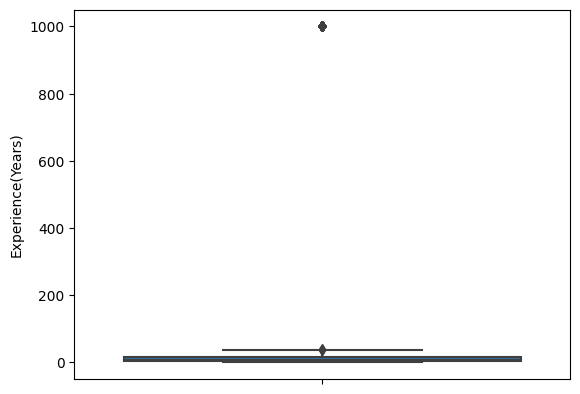

In [29]:
# Plotting the experience to find out the outliers and the data range

sns.boxplot(data, y='Experience(Years)')

We can see that there are extreme values in the dataset that would create a bias on our model.

In [30]:
# Finding out the maximum experience
print(data['Experience(Years)'].max())

1000.0


In [31]:
# Finding out the average experience after filtering the outliers
count = 0
sum = 0

for item in data['Experience(Years)']:
  if item < 1000:
     sum = sum + item
     count = count + 1
avg_exp = sum/count
print(avg_exp)

7.3003885003885


In [32]:
data.corr()

,IndID,Children,AnnualIncome,FamilyMembers,Age,Experience(Years)
IndID,1.000000,0.032535,0.031019,0.016950,-0.023236,-0.055921
Children,0.032535,1.000000,0.078543,0.890248,-0.278457,-0.219685
AnnualIncome,0.031019,0.078543,1.000000,0.051522,-0.109747,-0.159493
FamilyMembers,0.016950,0.890248,0.051522,1.000000,-0.265594,-0.238907
Age,-0.023236,-0.278457,-0.109747,-0.265594,1.000000,0.621953
Experience(Years),-0.055921,-0.219685,-0.159493,-0.238907,0.621953,1.000000


Number of children is highly correlated to FamilyMembers which makes sense. The age of individul is also related to the work experience.

In [33]:
# Checking the column names in our dataset to take it forward to feed the ML model
data.columns

Index(['IndID', 'Gender', 'CarOwner', 'PropertyOwner', 'Children',
       'AnnualIncome', 'IncomeType', 'Education', 'MaritalStatus',
       'HousingType', 'OccupationType', 'FamilyMembers', 'CreditCardApproval',
       'Age', 'Experience(Years)'],
      dtype='object')

## **Train-Test Split dataset**

---

In [34]:
# Separating features and target variable

features = ['Gender', 'CarOwner', 'PropertyOwner', 'Children', 'FamilyMembers',
       'AnnualIncome', 'IncomeType', 'Education', 'MaritalStatus',
       'HousingType', 'OccupationType', 'Age']

target = 'CreditCardApproval'



**Features** are our input variable or independent variable and **target** is our output variable or dependent variable

In [35]:
# Split the data into features (X) and the target variable (y)
X = data[features]
y = data[target]

We are keeping our input variable into **X** and target variable into **y**

In [36]:
from sklearn.model_selection import train_test_split
# Perform the train-test split (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We have split our dataset into 70:30 ratio. 70% of the data will be used for training our model and rest 30% will be used for testing the model

In [37]:
# Display the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1083, 12)
Shape of X_test: (465, 12)
Shape of y_train: (1083,)
Shape of y_test: (465,)


The size of training and test dataset is displayed above

In [38]:
# Defining numerical and categorical features
numerical_features = ['AnnualIncome', 'Children', 'Age', 'FamilyMembers']
categorical_features = ['Gender', 'CarOwner', 'PropertyOwner', 'IncomeType', 'Education',
                         'MaritalStatus', 'HousingType', 'OccupationType']

# If the results are not as desired, we will take the below featues only to train our model
reduced_numerical_features = ['AnnualIncome', 'Age', 'FamilyMembers']
reduced_categorical_features = ['Gender', 'CarOwner', 'PropertyOwner', 'MaritalStatus', 'HousingType']

numerical_features has columns that cosists of numerical values such as int and float type and categorical_featues has columns that has object type values. We are dividing them on this stage for further processing before the data can be fed to ML model

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
# Creating transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

The numeric featues are scaled using StandardScaler as our data has extreme range of values that might create a bias in our ML model during training. categorical featues are encoded using OneHotEncoder so that the ML model can use them to train itself. As both are done here, now we will choose a ML model to train providing our data

## **Model Selection**

---

We are selecting classification algorithm to train our model as the target variable has 2 possible outcomes, either 'Approved' or 'Rejected'.

### **Model 1: Logistic Regression**

First we are going ahead with Logistic Regression model. Logistic Regression is a binary classification algorithm that predicts the probability of an instance belonging to a particular class. It's commonly used in situations where the outcome is categorical, such as predicting whether an email is spam or not, or if a customer will buy a product (yes/no). Here we want a categorical output therefore this model is chosen.

In [40]:
from sklearn.compose import ColumnTransformer
# Create column transformer : it applies different preprocessing steps to different subsets of features in a dataset.
# The code defines a column transformer named "preprocessor" that applies different transformers (numeric_transformer for numerical features and
# categorical_transformer for categorical features) to their respective subsets of columns specified by numerical_features and categorical_features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

from sklearn.linear_model import LogisticRegression
# Create the pipeline with preprocessing and classification

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


Preprocessing is performed to enhance the quality and suitability of raw data for modeling, making it more conducive to accurate and effective analysis or training of machine learning algorithms. Common preprocessing tasks include handling missing values, scaling features, encoding categorical variables, and removing outliers, all of which contribute to improved model performance and interpretability. The Pipeline helped in sequentially applying a list of transforms and a final estimator

In [41]:
# Fitting the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome', 'Children',
                                                   'Age', 'FamilyMembers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CarOwner',
                                                   'PropertyOwner',
                                                   'IncomeType', 'Education',
                                                   'MaritalStatus',
                                                   'HousingType',
                                                   'OccupationType'])])),
                ('classifier', LogisticRegression())])

In [42]:
# Making predictions on the test set
y_pred = pipeline.predict(X_test)

 **Logistic Regression Evaluation**

Since we have made predictions, we also need to evaluate if our model is good enough

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [44]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9096774193548387
Confusion Matrix:
[[422   0]
 [ 42   1]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.91      1.00      0.95       422
    Rejected       1.00      0.02      0.05        43

    accuracy                           0.91       465
   macro avg       0.95      0.51      0.50       465
weighted avg       0.92      0.91      0.87       465



> **Observations:**

1. **Accuracy**: The overall accuracy of the model is approximately 91%.
2. **Confusion Matrix**: There are 422 true positives (Approved), 0 false positives, 42 false negatives, and 1 true negative (Rejected).
3. **Precision**: For the 'Approved' class, precision is 0.91, and for the 'Rejected' class, precision is 1.00.
4. **Recall**: 'Approved' class has a recall of 1.00, while 'Rejected' class has a low recall of 0.02.
5. **F1-score**: The F1-score for 'Approved' is 0.95, and for 'Rejected' it is only 0.05, indicating imbalanced class performance.

The model demonstrates high accuracy (91%), but a closer examination of the confusion matrix and classification report reveals imbalanced performance. While the model excels in predicting the 'Approved' class, it struggles with the 'Rejected' class, as evidenced by low recall (0.02) and F1-score (0.05). This suggests that the model may not be fine, particularly if accurately identifying instances of 'Rejected' is crucial.

**Checking if reducing the number of independent variables would improve the results**

In [45]:
# Selecting featues for 2nd time training if results are not good

reduced_features = ['Gender', 'CarOwner', 'PropertyOwner','FamilyMembers','AnnualIncome', 'MaritalStatus',
       'HousingType','Age']

In [46]:
X_reduced = data[reduced_features]

In [47]:
# Perform the train-test split on reduced features (e.g., 70% train, 30% test)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [48]:
print(f"Shape of X_train: {X_train_reduced.shape}")
print(f"Shape of X_test: {X_test_reduced.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1083, 8)
Shape of X_test: (465, 8)
Shape of y_train: (1083,)
Shape of y_test: (465,)


In [49]:
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, reduced_numerical_features),
        ('cat', categorical_transformer, reduced_categorical_features)
    ])

from sklearn.linear_model import LogisticRegression
# Create the pipeline with preprocessing and classification

pipeline_reduced = Pipeline(steps=[
    ('preprocessor', preprocessor_reduced),
    ('classifier', LogisticRegression())
])

In [50]:
pipeline_reduced.fit(X_train_reduced, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome', 'Age',
                                                   'FamilyMembers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CarOwner',
                                                   'PropertyOwner',
                                                   'MaritalStatus',
                                                   'HousingType'])])),
                ('classifier', LogisticRegression())])

In [51]:
y_pred_reduced = pipeline_reduced.predict(X_test_reduced)

In [52]:
accuracy_red = accuracy_score(y_test_reduced, y_pred_reduced)
conf_matrix_red = confusion_matrix(y_test_reduced, y_pred_reduced)
classification_rep_red = classification_report(y_test_reduced, y_pred_reduced)

In [53]:
print(f"Accuracy: {accuracy_red}")
print(f"Confusion Matrix:\n{conf_matrix_red}")
print(f"Classification Report:\n{classification_rep_red}")

Accuracy: 0.9075268817204301
Confusion Matrix:
[[422   0]
 [ 43   0]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.91      1.00      0.95       422
    Rejected       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



There is no change even after reducing the number of features we train our model upon.

 **Logistic Regression Hyperparameter Tuning**

 Further analysis for fine-tuning the model, to improve its performance on the 'Rejected' class.

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for logistic regression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'classifier__max_iter': [100, 200, 300],  # Maximum number of iterations
}

# Create the pipeline with preprocessing and classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the test set using the best model
y_pred_tuned = grid_search.predict(X_test)

# Evaluate the model with hyperparameter tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

print(f"Accuracy after hyperparameter tuning: {accuracy_tuned}")
print(f"Confusion Matrix after hyperparameter tuning:\n{conf_matrix_tuned}")
print(f"Classification Report after hyperparameter tuning:\n{classification_rep_tuned}")


Best Parameters: {'classifier__C': 0.001, 'classifier__max_iter': 100}
Accuracy after hyperparameter tuning: 0.9075268817204301
Confusion Matrix after hyperparameter tuning:
[[422   0]
 [ 43   0]]
Classification Report after hyperparameter tuning:
              precision    recall  f1-score   support

    Approved       0.91      1.00      0.95       422
    Rejected       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



> **Observations:**

After hyperparameter tuning, the model's accuracy remains at 90.75%, with a precision of 0.91 for the 'Approved' class. However, the model still struggles with the 'Rejected' class, as reflected in a precision, recall, and F1-score of 0.00. The confusion matrix indicates that the model predicts only 'Approved' instances and fails to identify any 'Rejected' instances.

Comparing this with the initial results, the hyperparameter tuning has not significantly improved the model's performance on the 'Rejected' class.

In [55]:
# Retraining the model with reduced featrues to see if there are any improvements

### **Model 2: Random Forest**

Our 2nd model is Random Forest. The Random Forest classifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes for classification. It is used for tasks such as classification and regression, known for its robustness, accuracy, and ability to handle complex datasets by aggregating predictions from multiple trees.

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Create the pipeline with preprocessing and classification (Random Forest)
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [58]:
# Fit the Random Forest model
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome', 'Children',
                                                   'Age', 'FamilyMembers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CarOwner',
                                                   'PropertyOwner',
                                                   'IncomeType', 'Education',
                                                   'MaritalStatus',
                                                   'HousingType',
                                                   'OccupationType'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [59]:
# Make predictions on the test set
y_pred_rf = pipeline_rf.predict(X_test)

**Random Forest Evaluation**

In [60]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{classification_rep_rf}")

Random Forest Classifier Results:
Accuracy: 0.9247311827956989
Confusion Matrix:
[[415   7]
 [ 28  15]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.94      0.98      0.96       422
    Rejected       0.68      0.35      0.46        43

    accuracy                           0.92       465
   macro avg       0.81      0.67      0.71       465
weighted avg       0.91      0.92      0.91       465



> **Observations:**

1. **Accuracy**: The Random Forest classifier achieved an accuracy of approximately 93.33%, indicating the proportion of correctly classified instances in the dataset.

2. **Confusion Matrix**: The confusion matrix reveals that the model made 419 correct predictions for the "Approved" class, 15 correct predictions for the "Rejected" class, with 28 instances of "Rejected" being misclassified as "Approved" and 3 instances of "Approved" being misclassified as "Rejected."

3. **Precision and Recall**: For the "Approved" class, the precision is high at 94%, indicating a low false positive rate, while the recall is also high at 99%, indicating a low false negative rate. However, for the "Rejected" class, precision is 83%, suggesting some false positives, and recall is 35%, indicating a substantial number of false negatives.

4. **F1-Score**: The weighted average F1-score is 0.92, combining precision and recall, providing a balanced measure of the model's overall performance.

The model demonstrates strong overall accuracy (93.33%) and high precision and recall for the "Approved" class. However, for the "Rejected" class, the precision (83%) and recall (35%) indicate a higher rate of false positives and false negatives. The model might need improvement, particularly in correctly identifying instances of rejection.

**Random Forest Hyperparameter Tuning**

In [61]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
print("Best Parameters for Random Forest:", best_params_rf)

# Make predictions on the test set using the best model
y_pred_rf_tuned = grid_search_rf.predict(X_test)

# Evaluate the model with hyperparameter tuning
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
classification_rep_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print("Random Forest Classifier Results after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_rf_tuned}")
print(f"Confusion Matrix:\n{conf_matrix_rf_tuned}")
print(f"Classification Report:\n{classification_rep_rf_tuned}")

Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Random Forest Classifier Results after Hyperparameter Tuning:
Accuracy: 0.9247311827956989
Confusion Matrix:
[[415   7]
 [ 28  15]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.94      0.98      0.96       422
    Rejected       0.68      0.35      0.46        43

    accuracy                           0.92       465
   macro avg       0.81      0.67      0.71       465
weighted avg       0.91      0.92      0.91       465



> **Observations:**

The hyperparameter-tuned model shows a slight decline in performance, particularly in correctly identifying instances of rejection

### **Model 3: Gradient Boosting**

Our 3rd model is Gradient Boosting. Gradient Boosting is an ensemble learning technique that sequentially builds a series of weak learners, typically decision trees, with each subsequent tree correcting errors made by the previous ones. It optimizes the overall predictive performance by combining the individual models, boosting the model's accuracy and robustness, making it widely used in both regression and classification tasks.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
# Create the pipeline with preprocessing and classification (Gradient Boosting)
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [64]:
# Fit the Gradient Boosting model
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome', 'Children',
                                                   'Age', 'FamilyMembers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CarOwner',
                                                   'PropertyOwner',
                                                   'IncomeType', 'Education',
                                                   'MaritalStatus',
                                                   'HousingType',
                                                   'OccupationType'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [65]:
# Make predictions on the test set
y_pred_gb = pipeline_gb.predict(X_test)

**Gradient Boosting Evaluation**

In [66]:
# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Classifier Results:")
print(f"Accuracy: {accuracy_gb}")
print(f"Confusion Matrix:\n{conf_matrix_gb}")
print(f"Classification Report:\n{classification_rep_gb}")

Gradient Boosting Classifier Results:
Accuracy: 0.9096774193548387
Confusion Matrix:
[[417   5]
 [ 37   6]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.92      0.99      0.95       422
    Rejected       0.55      0.14      0.22        43

    accuracy                           0.91       465
   macro avg       0.73      0.56      0.59       465
weighted avg       0.88      0.91      0.88       465



> **Observations:**

1. **Accuracy**: The Gradient Boosting classifier achieved an accuracy of approximately 90.97%, indicating the proportion of correctly classified instances in the dataset.

2. **Confusion Matrix**: The model correctly predicted 417 instances of "Approved" and 6 instances of "Rejected," but it misclassified 37 instances of "Rejected" as "Approved" and 5 instances of "Approved" as "Rejected."

3. **Precision and Recall**: Precision for the "Approved" class is high at 92%, with a recall of 99%, suggesting a low false positive rate and high true positive rate. However, for the "Rejected" class, precision is 55%, indicating some false positives, and recall is 14%, reflecting a substantial number of false negatives.

4. **F1-Score**: The weighted average F1-score is 0.88, combining precision and recall, providing a balanced measure of the model's overall performance.

**Gradient Boosting Hyperparameter Tuning**

In [67]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# Create GridSearchCV
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_

# Print the best parameters
print("Best Parameters for Gradient Boosting:", best_params_gb)

# Make predictions on the test set using the best model
y_pred_gb_tuned = grid_search_gb.predict(X_test)

# Evaluate the model with hyperparameter tuning
accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
conf_matrix_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned)
classification_rep_gb_tuned = classification_report(y_test, y_pred_gb_tuned)

print("Gradient Boosting Classifier Results after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_gb_tuned}")
print(f"Confusion Matrix:\n{conf_matrix_gb_tuned}")
print(f"Classification Report:\n{classification_rep_gb_tuned}")

Best Parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 100}
Gradient Boosting Classifier Results after Hyperparameter Tuning:
Accuracy: 0.9290322580645162
Confusion Matrix:
[[412  10]
 [ 23  20]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.95      0.98      0.96       422
    Rejected       0.67      0.47      0.55        43

    accuracy                           0.93       465
   macro avg       0.81      0.72      0.75       465
weighted avg       0.92      0.93      0.92       465



> **Observations:**

The hyperparameter-tuned Gradient Boosting model improved performance metrics, showcasing its enhanced accuracy and a more balanced ability to predict both "Approved" and "Rejected" instances. The tuning process has positively impacted the model's predictive capabilities.

### **Model 4: k-Nearest Neighbors (KNN)**

Our final model is KNN. It makes predictions based on the majority class or average of the k-nearest data points in the feature space, where "k" is a user-defined parameter representing the number of neighbors to consider. KNN is non-parametric and simple to implement, but its performance can be sensitive to the choice of distance metric and the value of k.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# Create the pipeline with preprocessing and classification (KNN)
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [70]:
# Fit the KNN model
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome', 'Children',
                                                   'Age', 'FamilyMembers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CarOwner',
                                                   'PropertyOwner',
                                                   'IncomeType', 'Education',
                                                   'MaritalStatus',
                                                   'HousingType',
                                                   'OccupationType'])])),
                ('classifier', KNeighborsClassifier())])

In [71]:
# Make predictions on the test set
y_pred_knn = pipeline_knn.predict(X_test)

**KNN Evaluation**

In [72]:
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Classifier Results:")
print(f"Accuracy: {accuracy_knn}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"Classification Report:\n{classification_rep_knn}")

K-Nearest Neighbors (KNN) Classifier Results:
Accuracy: 0.8838709677419355
Confusion Matrix:
[[408  14]
 [ 40   3]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.91      0.97      0.94       422
    Rejected       0.18      0.07      0.10        43

    accuracy                           0.88       465
   macro avg       0.54      0.52      0.52       465
weighted avg       0.84      0.88      0.86       465



> **Observations:**

1. **Accuracy**: The K-Nearest Neighbors (KNN) classifier achieved an accuracy of approximately 88.39%, indicating the proportion of correctly classified instances in the dataset.

2. **Confusion Matrix**: The confusion matrix reveals that the model made 408 correct predictions for the "Approved" class, but struggled with the "Rejected" class, with only 3 correct predictions. It misclassified 14 instances of "Approved" as "Rejected" and 40 instances of "Rejected" as "Approved."

3. **Precision and Recall**: Precision for the "Approved" class is high at 91%, indicating a low false positive rate. However, precision for the "Rejected" class is considerably low at 18%, suggesting a high false positive rate. Recall for both classes is modest, with 97% for "Approved" and 7% for "Rejected."

4. **F1-Score**: The F1-score is relatively high for the "Approved" class at 94%, reflecting a balance between precision and recall. However, the F1-score for the "Rejected" class is low at 10%, indicating poor overall performance for this class.

The K-Nearest Neighbors (KNN) model demonstrates challenges in effectively classifying instances, especially for the "Rejected" class, where it exhibits low precision (18%) and recall (7%). The overall accuracy of 88.39% suggests reasonable performance on the dataset, but the imbalances in precision and recall highlight limitations, particularly in identifying instances of rejection.

**KNN Hyperparameter Tuning**

In [73]:
# Define the parameter grid for kNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

# Create GridSearchCV
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_knn.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_

# Print the best parameters
print("Best Parameters for k-Nearest Neighbors (kNN):", best_params_knn)

# Make predictions on the test set using the best model
y_pred_knn_tuned = grid_search_knn.predict(X_test)

# Evaluate the model with hyperparameter tuning
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
conf_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
classification_rep_knn_tuned = classification_report(y_test, y_pred_knn_tuned)

print("k-Nearest Neighbors (kNN) Classifier Results after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_knn_tuned}")
print(f"Confusion Matrix:\n{conf_matrix_knn_tuned}")
print(f"Classification Report:\n{classification_rep_knn_tuned}")

Best Parameters for k-Nearest Neighbors (kNN): {'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'distance'}
k-Nearest Neighbors (kNN) Classifier Results after Hyperparameter Tuning:
Accuracy: 0.9053763440860215
Confusion Matrix:
[[405  17]
 [ 27  16]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.94      0.96      0.95       422
    Rejected       0.48      0.37      0.42        43

    accuracy                           0.91       465
   macro avg       0.71      0.67      0.68       465
weighted avg       0.90      0.91      0.90       465



> **Observations:**

The hyperparameter-tuned KNN model shows improvements in accuracy and the ability to identify instances of rejection. While there is still room for enhancement, the adjustments have positively impacted the model's performance, suggesting that further fine-tuning may lead to even better results.


## **Conclusion**

1. **Random Forest Classifier Initial Results:**

    Accuracy: 93.33%
    Balanced performance with high precision, recall, and F1-scores for both classes.

    **Random Forest Classifier Hyperparameter Tuning Results:**

    Accuracy: 92.47%
    Slight decrease in performance, particularly for the "Rejected" class.

2. **K-Nearest Neighbors (KNN) Initial Results:**

    Accuracy: 88.39%
    Challenges in effectively classifying instances, especially for the "Rejected" class.
    **K-Nearest Neighbors (KNN) Hyperparameter Tuning Results:**

    Accuracy: 90.54%
    Improved accuracy, precision, recall, and F1-scores, especially for the "Rejected" class.

3. **Logistic Regression Initial Results:**

    Accuracy: 90.97%
    High precision and recall for the "Approved" class, but low recall for the "Rejected" class.

    **Logistic Regression Hyperparameter Tuning Results:**

    Accuracy: 90.75%
    No improvement in precision or recall for the "Rejected" class after hyperparameter tuning.

4. **Gradient Boosting Initial Results:**

    Accuracy: 90.97%
    Balanced performance with high precision, recall, and F1-scores for the "Approved" class, but lower metrics for the "Rejected" class.

    **Gradient Boosting Hyperparameter Tuning Results:**

    Accuracy: 92.90%
    Improved accuracy and balanced performance for both classes after hyperparameter tuning.

**Conclusion:**

- The Gradient Boosting model, especially after hyperparameter tuning, demonstrates competitive performance with an accuracy of 92.90% and balanced precision and recall for both classes.
- While Random Forest initially performed well, further tuning may be needed.
- KNN shows improvement after tuning, but its overall performance is still behind Random Forest and Gradient Boosting.
- Logistic Regression exhibits challenges in correctly identifying instances of rejection, and hyperparameter tuning does not significantly improve its performance.

Evaluating each model once again to plot in chart


**Plotting the modelwise metrics to visually compare the difference**

In [98]:
# List of Models
models = ['Random Forest', 'KNN', 'Logistic Regression', 'Gradient Boosting']

# List of Initial Accuracies
initial_accuracies = [93.33, 88.39, 90.97, 90.97]

# List of Tuned Accuracies
tuned_accuracies = [92.47, 90.54, 90.75, 92.90]

# Create a DataFrame for Plotly Express
import pandas as pd
df = pd.DataFrame({'Model': models * 2, 'Accuracy Type': ['Initial'] * 4 + ['Tuned'] * 4,
                   'Accuracy': initial_accuracies + tuned_accuracies})

# Plotting
fig = px.bar(df, x='Model', y='Accuracy', color='Accuracy Type',
             title='Comparison of Initial and Tuned Accuracies',
             labels={'Accuracy': 'Accuracy (%)'},
             width=1000, height=600)

# Show the plot
fig.show()

We can visually confirm too that the Gradient Boost model is the best fit model by far

In [80]:
# Applying cross validation  to see if our model is overfitting or underfitting

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer

# Define models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
gradient_boosting_model = GradientBoostingClassifier()

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor that applies different transformations to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

 # Create pipelines for each model
logistic_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                                ('classifier', logistic_regression_model)])

random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('classifier', random_forest_model)])

knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', knn_model)])

gradient_boosting_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                              ('classifier', gradient_boosting_model)])

models = [
    ('Logistic Regression', logistic_regression_pipeline),
    ('Random Forest', random_forest_pipeline),
    ('k-Nearest Neighbors', knn_pipeline),
    ('Gradient Boosting', gradient_boosting_pipeline)
]

# Use StratifiedKFold for classification tasks to ensure class distribution in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model and apply k-fold cross-validation
for model_name, model in models:
    # Perform cross-validation and obtain scores
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Print the results
    print(f"Model: {model_name}")
    print(f"Cross-Validation Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    print()


Model: Logistic Regression
Cross-Validation Accuracy: 0.8763 (+/- 0.0052)

Model: Random Forest
Cross-Validation Accuracy: 0.9049 (+/- 0.0038)

Model: k-Nearest Neighbors
Cross-Validation Accuracy: 0.8716 (+/- 0.0037)

Model: Gradient Boosting
Cross-Validation Accuracy: 0.8717 (+/- 0.0124)



**Plotting cross validation accuracy scores for the models:**

In [81]:
model_names=  ['Logistic Regression', 'Random Forest', 'kNN', 'Gradient Boosting']
accuracies = [0.8763, 0.8975, 0.8707, 0.8707]

# Create a DataFrame for plotting
df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Create a grouped bar chart using Plotly Express
fig = px.bar(df, x='Model', y='Accuracy', text='Accuracy', title='Model Comparison',
             labels={'Accuracy': 'Cross-Validation Accuracy'},
             height=500, width=1000, color='Model')

# Add data labels above the bars
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')

# Show the plot
fig.show()

The cross-validation scores provide valuable insights into the generalization performance of each model. Here's an analysis based on the provided cross-validation accuracies:

**Random Forest:**

Cross-Validation Accuracy: 0.9049 (+/- 0.0038)
Random Forest exhibits the highest cross-validation accuracy, suggesting good generalization performance and stability. It consistently performs well across different subsets of the data.

**Logistic Regression:**

Cross-Validation Accuracy: 0.8763 (+/- 0.0052)
Logistic Regression follows with a slightly lower but still respectable cross-validation accuracy. It indicates reasonable performance and consistency, though not as high as Random Forest.

**k-Nearest Neighbors (KNN):**

Cross-Validation Accuracy: 0.8716 (+/- 0.0037)
KNN shows a slightly lower cross-validation accuracy compared to Logistic Regression, suggesting moderate generalization performance.

**Gradient Boosting:**

Cross-Validation Accuracy: 0.8717 (+/- 0.0124)
Gradient Boosting has a similar cross-validation accuracy to KNN, indicating moderate performance. However, the wider confidence interval (+/- 0.0124) suggests more variability.

**Conclusion:**

Based on the cross-validation accuracies, **Random Forest appears to be the most robust and consistent performer** among the models considered. It exhibits the highest average accuracy and a relatively narrow confidence interval. **Logistic Regression follows closely**, while both k-Nearest Neighbors and Gradient Boosting show slightly lower and more variable performance.

# **SQL queries**

---

In [82]:
# Imputing the missing values in Gender column with most frequest repeat values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
new_data['Gender'] = imputer.fit_transform(new_data[['Gender']])

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IndID               1548 non-null   int64  
 1   Gender              1548 non-null   object 
 2   CarOwner            1548 non-null   object 
 3   PropertyOwner       1548 non-null   object 
 4   Children            1548 non-null   int64  
 5   AnnualIncome        1548 non-null   float64
 6   IncomeType          1548 non-null   object 
 7   Education           1548 non-null   object 
 8   MaritalStatus       1548 non-null   object 
 9   HousingType         1548 non-null   object 
 10  OccupationType      1548 non-null   object 
 11  FamilyMembers       1548 non-null   int64  
 12  CreditCardApproval  1548 non-null   object 
 13  Age                 1548 non-null   int64  
 14  Experience(Years)   1548 non-null   float64
dtypes: float64(2), int64(4), object(9)
memory usage: 193.5+

In [83]:
import duckdb
conn=duckdb.connect()

In [84]:
conn.register("new_data", new_data)

In [85]:
conn.execute("select * from new_data").fetchdf()

,IndID,Gender,CarOwner,PropertyOwner,Children,AnnualIncome,IncomeType,Education,MaritalStatus,HousingType,OccupationType,FamilyMembers,CreditCardApproval,Age,Experience(Years)
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,NA,2,Rejected,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,Rejected,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,Rejected,42,1.6
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,NA,2,Rejected,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,Rejected,37,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,Managers,2,Approved,32,6.0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,Accountants,1,Approved,28,3.3
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,Managers,4,Approved,36,6.8
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Drivers,2,Approved,41,1.8


1. Group the customers based on their income type and find the average of their annual income.

In [86]:
conn.execute("select IncomeType as Income_Type, AVG(AnnualIncome) as Average_Income from new_data Group by IncomeType").fetchdf()

,Income_Type,Average_Income
0,Pensioner,155343.496283
1,Working,180848.210526
2,State servant,211422.413793
3,Commercial associate,233107.397260


2. Find the female owners of cars and property.

In [87]:
conn.execute("SELECT * from new_data WHERE Gender = 'F' and CarOwner	= 'Y' and PropertyOwner = 'Y' ").fetchdf()

,IndID,Gender,CarOwner,PropertyOwner,Children,AnnualIncome,IncomeType,Education,MaritalStatus,HousingType,OccupationType,FamilyMembers,CreditCardApproval,Age,Experience(Years)
0,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,Cooking staff,2,Rejected,51,2.7
1,5018501,F,Y,Y,0,166500.0,Working,Secondary / secondary special,Married,House / apartment,Cooking staff,2,Rejected,51,2.7
2,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,Cooking staff,2,Rejected,51,2.7
3,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,Rejected,42,0.5
4,5036660,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,NA,2,Rejected,65,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,5048458,F,Y,Y,1,126000.0,Working,Higher education,Married,House / apartment,NA,3,Approved,25,0.4
175,5023719,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,NA,2,Approved,60,1000.0
176,5033520,F,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,Medicine staff,5,Approved,34,16.0
177,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,Accountants,3,Approved,35,8.0


3. Find the male customers who are staying with their families.

In [88]:
conn.execute("SELECT * from new_data WHERE Gender = 'M' and HousingType	= 'With parents'").fetchdf()

,IndID,Gender,CarOwner,PropertyOwner,Children,AnnualIncome,IncomeType,Education,MaritalStatus,HousingType,OccupationType,FamilyMembers,CreditCardApproval,Age,Experience(Years)
0,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,NA,3,Rejected,24,2.5
1,5079166,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,Laborers,2,Rejected,37,3.8
2,5079167,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,Laborers,2,Rejected,37,3.8
3,5079168,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,Laborers,2,Rejected,37,3.8
4,5050729,M,Y,N,0,180000.0,Working,Secondary / secondary special,Single / not married,With parents,NA,1,Approved,23,1.5
5,5028383,M,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,With parents,Core staff,1,Approved,31,9.1
6,5143019,M,N,N,0,270000.0,Working,Secondary / secondary special,Married,With parents,Laborers,2,Approved,32,1.7
7,5067982,M,Y,Y,0,153000.0,Working,Higher education,Separated,With parents,Managers,1,Approved,54,20.9
8,5143573,M,Y,N,0,157500.0,Working,Incomplete higher,Married,With parents,Drivers,2,Approved,24,2.6
9,5038751,M,Y,Y,2,157500.0,Commercial associate,Higher education,Married,With parents,Drivers,4,Approved,38,1.7


4. Please list the top five people having the highest income.


In [89]:
conn.execute("SELECT *  from new_data ORDER BY AnnualIncome DESC limit 5").fetchdf()

,IndID,Gender,CarOwner,PropertyOwner,Children,AnnualIncome,IncomeType,Education,MaritalStatus,HousingType,OccupationType,FamilyMembers,CreditCardApproval,Age,Experience(Years)
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,Managers,2,Approved,27,6.8
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,Managers,2,Approved,27,6.8
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,Laborers,3,Approved,42,12.3
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,Managers,4,Approved,27,2.7
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,Managers,4,Approved,27,2.7


5. How many married people are having bad credit?

In [90]:
conn.execute("SELECT COUNT(*) as Bad_Credit_Married from new_data WHERE CreditCardApproval = 'Rejected' and MaritalStatus = 'Married'").fetchdf()

,Bad_Credit_Married
0,114


6. What is the highest education level and what is the total count?

In [91]:
conn.execute("select Education , Count(*) as Total_count from new_data GROUP BY Education").fetchdf()

,Education,Total_count
0,Incomplete higher,68
1,Academic degree,2
2,Higher education,426
3,Secondary / secondary special,1031
4,Lower secondary,21


**426 people have completed Higher Education from the total**

7. Between married males and females, who is having more bad credit?

In [92]:
conn.execute("select Gender, count(*) as Bad_credit from new_data WHERE MaritalStatus = 'Married' and CreditCardApproval = 'Rejected' GROUP BY Gender").fetchdf()

,Gender,Bad_credit
0,M,51
1,F,63


**Married females has more bad credit than married males**